In [11]:
import zipfile
import kaggle
import os

In [6]:
!kaggle datasets download -d sl6149/data-scientist-job-market-in-the-us

data-scientist-job-market-in-the-us.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
zipfile_name = 'data-scientist-job-market-in-the-us.zip'
target_directory = 'input'

# Create the target directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall(target_directory)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from matplotlib import colors 

In [16]:
df = pd.read_csv('input/alldata.csv')

In [17]:
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [19]:
df.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [20]:
df = df.dropna()

In [21]:
df.isnull().sum()

position       0
company        0
description    0
reviews        0
location       0
dtype: int64

In [22]:
df['position'].nunique()

4221

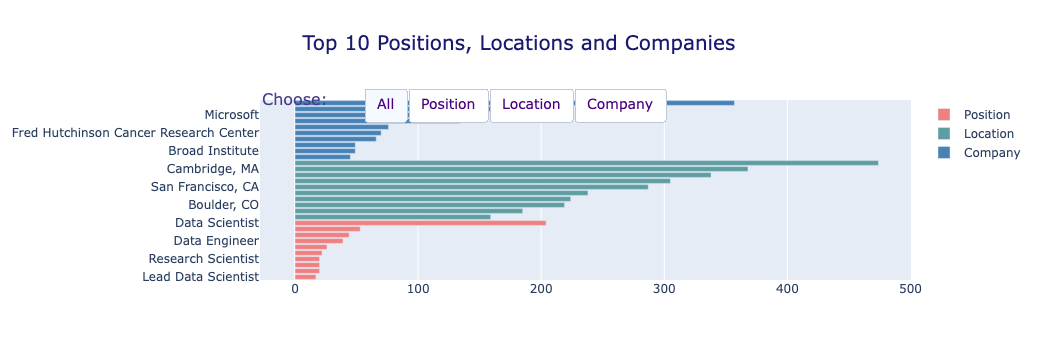

In [26]:
dfp = df['position'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = df['location'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfc = df['company'].value_counts().head(10).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['position'],
                     y = dfp['index'],
                     orientation='h',
                     name = 'Position',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = dfl['location'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Location',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['company'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Company',
                     marker = dict(color = 'SteelBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="Position", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Location', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Company', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="Top 10 Positions, Locations and Companies",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))

fig.show()

In [24]:
new = df["location"].str.split(", ", n=1,expand = True)
df["city"] = new[0]
df["state"] = new[1]

state = df["state"].str.split(" ",n=1,expand = True)
df["state"]=state[0]

df.head()

,position,company,description,reviews,location,city,state
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Atlanta,GA
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA 30318",Atlanta,GA
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA 30318",Atlanta,GA
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA",Atlanta,GA


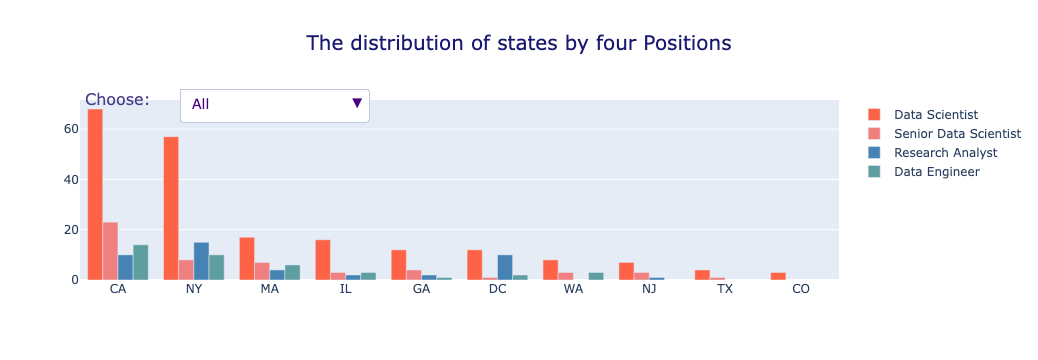

In [25]:
dfd1 = df[df['position']== 'Data Scientist']
dfd2 = df[df['position']== 'Senior Data Scientist']
dfd3 = df[df['position']== 'Research Analyst']
dfd4 = df[df['position']== 'Data Engineer']

redf1 = dfd1["state"].value_counts()[:10].reset_index()
redf2 = dfd2['state'].value_counts()[:10].reset_index()
redf3 = dfd3['state'].value_counts()[:10].reset_index()
redf4 = dfd4['state'].value_counts()[:10].reset_index()


fig = go.Figure()

fig.add_trace(go.Bar(x = redf1["index"],
                     y = redf1["state"],
                     marker = dict(color = 'Tomato'),
                     name = 'Data Scientist'))

fig.add_trace(go.Bar(x = redf2['index'],
                     y = redf2['state'],
                     name = 'Senior Data Scientist',
                     marker = dict(color = 'LightCoral')))

fig.add_trace(go.Bar(x = redf3['index'],
                     y = redf3['state'],
                     name = 'Research Analyst',
                     marker = dict(color = 'SteelBlue')))

fig.add_trace(go.Bar(x = redf4['index'],
                     y = redf4['state'],
                     name = 'Data Engineer',
                     marker = dict(color = 'CadetBlue')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            direction="down", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.13, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True,True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="Data Scientist", 
                     method="update", 
                     args=[ {"visible": [True, False, False,False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Senior Data Scientist', 
                     method="update", 
                     args=[ {"visible": [False, True, False,False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Research Analyst', 
                     method="update", 
                     args=[ {"visible": [False, False, True,False]}, 
                            {'showlegend' : True} 
                        ]),  
                dict(label='Data Engineer', 
                     method="update", 
                     args=[ {"visible": [False, False,False,True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="The distribution of states by four Positions",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))

fig.show()

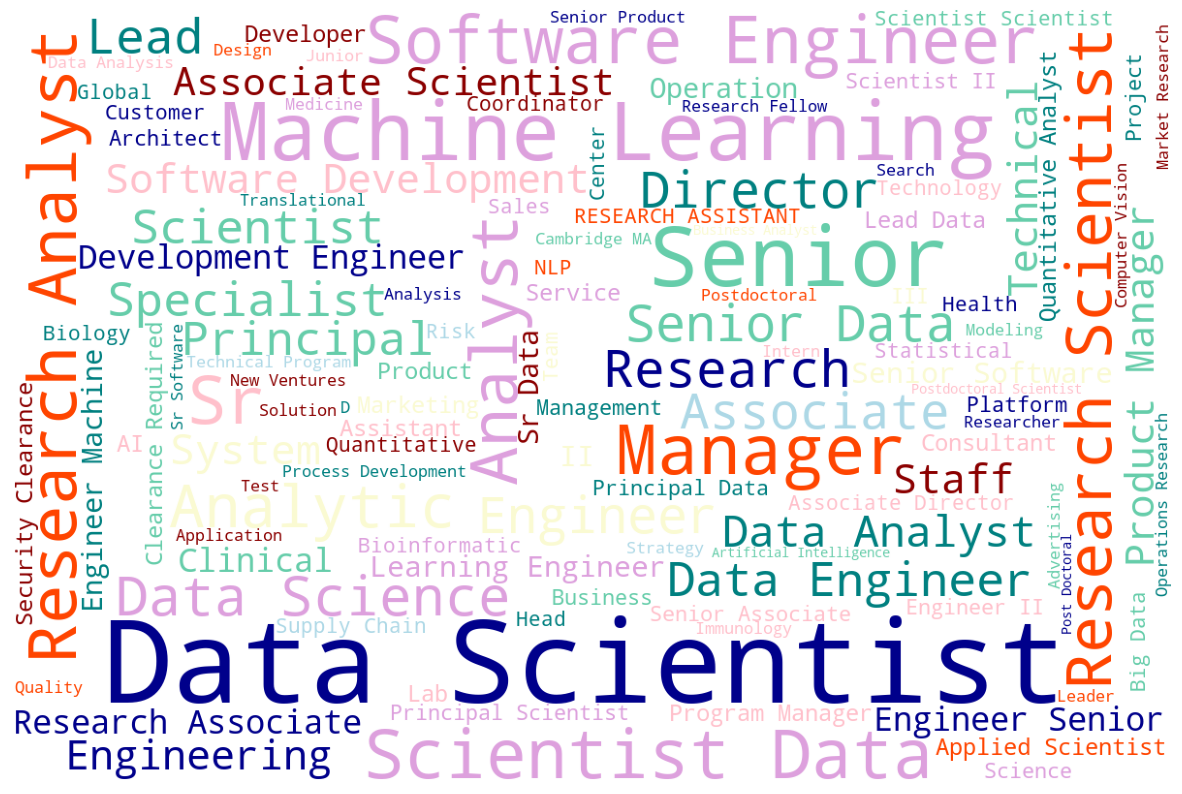

In [27]:
color_list=  ['DarkBlue','Teal','LightBlue','MediumAquamarine','Plum','OrangeRed','DarkRed','Pink','LightGoldenrodYellow']

colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (15,15)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 800 ,
                       max_words = 120,colormap = colormap ).generate(" ".join(df['position']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [28]:
positions = df['position'].value_counts()
top = list(positions.index)[:20]
top

['Data Scientist',
 'Senior Data Scientist',
 'Research Analyst',
 'Data Engineer',
 'Machine Learning Engineer',
 'Sr. Data Scientist',
 'Principal Data Scientist',
 'Quantitative Analyst',
 'Research Scientist',
 'Lead Data Scientist',
 'Data Analyst',
 'Software Engineer',
 'Software Engineer, Machine Learning',
 'Scientist',
 'Market Research Analyst',
 'Product Manager',
 'Senior Research Analyst',
 'Student Research Collaboration',
 'Senior Software Engineer',
 'Senior Scientist']

In [29]:
df['location'].nunique()

328

In [30]:
print(df['position'].value_counts())

Data Scientist                                            204
Senior Data Scientist                                      53
Research Analyst                                           44
Data Engineer                                              39
Machine Learning Engineer                                  26
                                                         ... 
Postdoctoral Scientist (Molecular Mechanism of Cancer)      1
Technical Manager                                           1
Senior Business Analyst                                     1
Associate Technical Sales Representative                    1
Principal Data Scientist, Deep Learning                     1
Name: position, Length: 4221, dtype: int64


<Axes: >

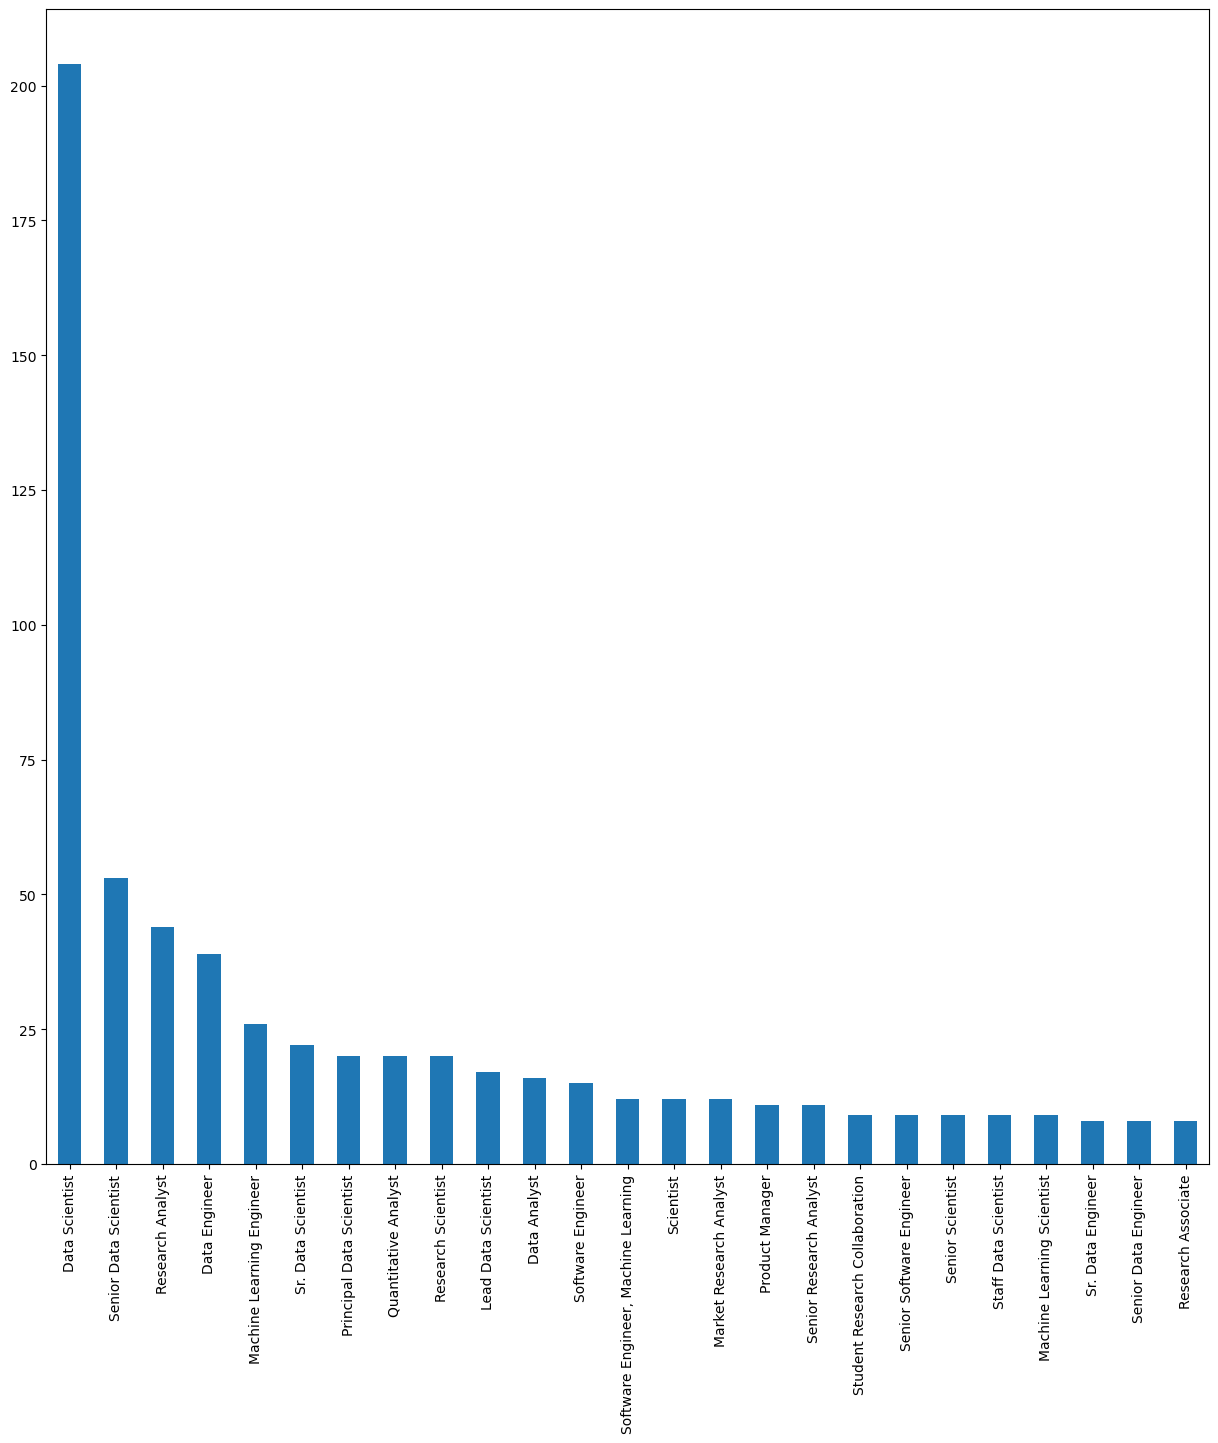

In [31]:
df['position'].value_counts().head(25).plot.bar()